In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

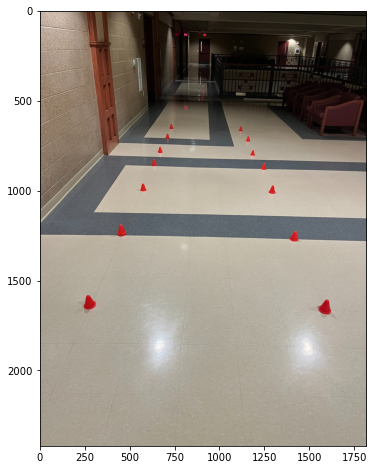

In [2]:
img = cv2.imread(r'red.png',1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converting to RBG colors

plt.figure(figsize=(10,8))
plt.imshow(img_rgb)
plt.show()

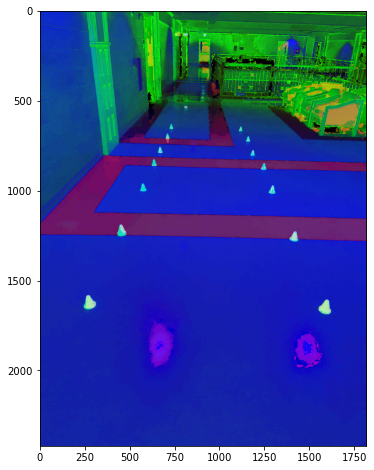

In [3]:
img_HSV = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV) # Converting to HSV colors

plt.figure(figsize=(10,8))
plt.imshow(img_HSV)
plt.show()

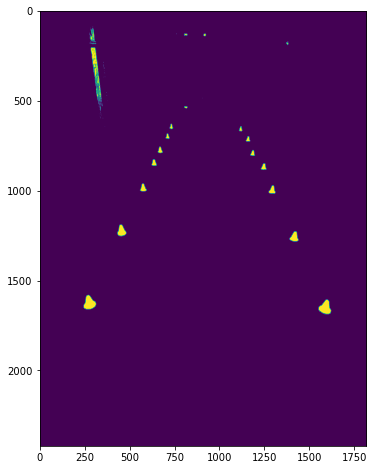

In [4]:
#Masking to get all the red colors

img_thresh = cv2.inRange(img_HSV, np.array([0, 135, 135]), np.array([179, 255, 255])) 

plt.figure(figsize=(10,8))
plt.imshow(img_thresh)
plt.show()

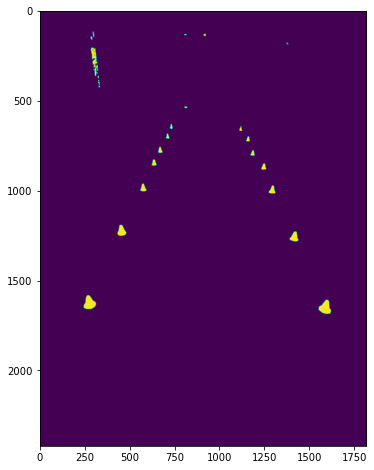

In [5]:
# Removing Noise from the image
kernel = np.ones((5, 5))
img_thresh_opened = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,8))
plt.imshow(img_thresh_opened)
plt.show()

In [6]:
# Finding Contours
contours,hierarchy = cv2.findContours(img_thresh_opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

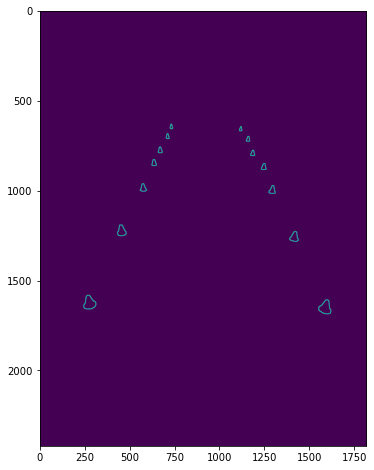

In [7]:
# Manual filltering 
pts = []
final_cone = []
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    if round(w/h,1) >=0.6: #Ratio of widht and height
        try:
            x1,y1,w1,h1 = cv2.boundingRect(contours[i+1])# Position of adjacent cone
            x2,y2,w2,h2 = cv2.boundingRect(contours[i+2])# Position of the cone that's behind 
        except IndexError:
            continue
        if round(((x2-x)**2 + (y2-y)**2)**0.5,0) <= 451 and round(((x1-x)**2 + (y1-y)**2)**0.5,0) >= 127:
            final_cone.append(contours[i])
            pts.append([x,y])

img_cones = np.zeros_like(img_thresh)
cv2.drawContours(img_cones, final_cone, -1, (255,255,255), 2)
plt.figure(figsize=(10,8))
plt.imshow(img_cones)
plt.show()


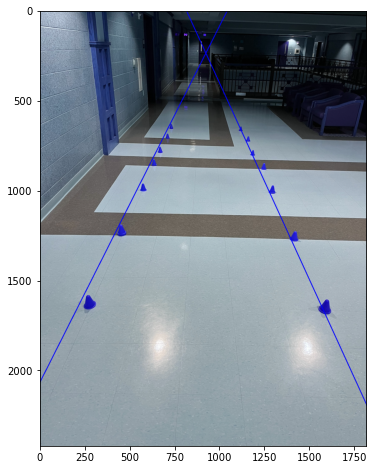

In [8]:
# Drawing lines throught the cones
def drawLine(image,x1,y1,x2,y2):

    m = (y2-y1) / (x2 - x1)
    w = image.shape[:2][1]
    px = 0
    py = -(x1-0) * m + y1

    qx = w
    qy = -(x2-w) * m + y2

    return cv2.line(image, [int(px), int(py)], [int(qx), int(qy)], (0, 0, 255), 3)

pts_1 =[]
pts_2 = []

for i in range(len(pts)):
    if i%2 == 0:
        pts_1.append(pts[i])
    else:
        pts_2.append(pts[i])

x1,y1 = pts_1[0][0],pts_1[0][1]
x2,y2 = pts_1[-1][0],pts_1[-1][1]

x3,y3 = pts_2[0][0],pts_2[0][1]
x4,y4 = pts_2[-1][0],pts_2[-1][1]
    
    
img_res = img.copy()
drawLine(img_res,x1,y1,x2,y2)
drawLine(img_res,x3,y3,x4,y4)
plt.figure(figsize=(10,8))
plt.imshow(img_res)
plt.show()